## Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Load Data from Joblib

Load the preprocessed cryptocurrency data saved from the data collection notebook.

In [2]:
# Load data package from joblib
data_file = '../data/crypto_data.joblib'

print(f"Loading data from: {data_file}")
data = joblib.load(data_file)

# Extract datasets
prices_df = data['prices_df']
returns_df = data['returns_df']
volumes_df = data['volumes_df']
market_caps_df = data['market_caps_df']
correlation_matrix = data['correlation_matrix']
covariance_matrix = data['covariance_matrix']
risk_metrics = data['risk_metrics']
fng_df = data['fng_df']
metadata = data['metadata']

print("\n" + "="*70)
print("Data Loaded Successfully!")
print("="*70)

# Display metadata
print(f"\nCollection Date: {metadata['collection_date']}")
print(f"Lookback Period: {metadata['lookback_days']} days")
print(f"Number of Assets: {metadata['num_assets']}")
print(f"Date Range: {metadata['date_range']['start']} to {metadata['date_range']['end']}")
print(f"\nAssets: {', '.join(metadata['assets'])}")

# Display shapes
print(f"\n{'='*70}")
print("Dataset Shapes:")
print(f"{'='*70}")
print(f"Prices:              {prices_df.shape}")
print(f"Returns:             {returns_df.shape}")
print(f"Volumes:             {volumes_df.shape}")
print(f"Market Caps:         {market_caps_df.shape}")
print(f"Correlation Matrix:  {correlation_matrix.shape}")
print(f"Covariance Matrix:   {covariance_matrix.shape}")
print(f"Risk Metrics:        {risk_metrics.shape}")
print(f"Fear & Greed Index:  {fng_df.shape}")

Loading data from: ../data/crypto_data.joblib

Data Loaded Successfully!

Collection Date: 2025-12-04T22:38:40.074161
Lookback Period: 1095 days
Number of Assets: 16
Date Range: 2022-12-06 00:00:00 to 2025-12-04 21:38:21

Assets: BTC, ETH, LTC, BCH, LINK, AAVE, UNI, SUSHI, MATIC, DOT, AVAX, TRX, SHIB, DOGE, XLM, SOL

Dataset Shapes:
Prices:              (1108, 16)
Returns:             (1107, 16)
Volumes:             (1108, 16)
Market Caps:         (1108, 16)
Correlation Matrix:  (16, 16)
Covariance Matrix:   (16, 16)
Risk Metrics:        (16, 5)
Fear & Greed Index:  (1095, 3)


## Quick Data Overview

In [3]:
# Display first few rows of key datasets
print("Price Data (first 5 rows):")
print(prices_df.head())

print("\n" + "="*70)
print("Returns Data (first 5 rows):")
print(returns_df.head())

print("\n" + "="*70)
print("Risk Metrics:")
print(risk_metrics.to_string(index=False))

Price Data (first 5 rows):
                     BTC          ETH        LTC         BCH      LINK  \
date                                                                     
2022-12-06  16973.372578  1259.757575  80.256749  110.459972  7.282625   
2022-12-07  17085.643141  1271.935476  79.974647  111.977089  7.136707   
2022-12-08  16851.303469  1233.625048  77.018333  109.383990  6.891856   
2022-12-09  17235.014158  1281.210637  78.506998  111.800929  7.005894   
2022-12-10  17149.824204  1264.477347  76.397049  109.837011  6.866399   

                 AAVE       UNI     SUSHI     MATIC       DOT       AVAX  \
date                                                                       
2022-12-06  64.355277  6.180378  1.382472  0.912769  5.492118  13.610339   
2022-12-07  63.923049  6.179808  1.264601  0.918216  5.504582  13.666111   
2022-12-08  61.407261  6.023331  1.162818  0.897855  5.303335  13.277327   
2022-12-09  62.850077  6.180170  1.187741  0.928114  5.431801  13.407864  

## Returns Distribution Analysis

Analyze the statistical properties of returns for each cryptocurrency.

In [4]:
# Statistical summary of returns
returns_stats = returns_df.describe().T
returns_stats['skewness'] = returns_df.skew()
returns_stats['kurtosis'] = returns_df.kurtosis()

print("Returns Statistical Summary:")
print("="*70)
print(returns_stats.to_string())

# Interpretation
print("\n" + "="*70)
print("Interpretation:")
print("="*70)
print("Skewness:")
print("  - Negative skew: More extreme negative returns (left tail)")
print("  - Positive skew: More extreme positive returns (right tail)")
print("\nKurtosis (excess kurtosis):")
print("  - Normal distribution: ~0")
print("  - High kurtosis (>3): Fat tails, more extreme events")
print("  - Low kurtosis (<3): Thin tails, fewer extreme events")

Returns Statistical Summary:
        count      mean       std       min       25%       50%       75%       max   skewness    kurtosis
BTC    1107.0  0.001821  0.024208 -0.086322 -0.010130  0.000017  0.012674  0.122669   0.530412    2.748497
ETH    1107.0  0.001361  0.032952 -0.146639 -0.013822  0.000335  0.016081  0.213910   0.593686    4.708534
LTC    1107.0  0.000768  0.038172 -0.219721 -0.017764  0.001107  0.018195  0.272303   0.229191    5.953276
BCH    1107.0  0.002416  0.044557 -0.138769 -0.019445  0.000000  0.018838  0.590578   3.091000   32.535553
LINK   1107.0  0.001584  0.044501 -0.206020 -0.024124  0.000000  0.024933  0.321896   0.614539    4.328485
AAVE   1107.0  0.002078  0.047121 -0.189233 -0.026109  0.000000  0.027315  0.282349   0.520563    3.209165
UNI    1107.0  0.001250  0.052014 -0.253349 -0.023937 -0.000660  0.023652  0.537900   1.992357   16.582242
SUSHI  1107.0  0.000362  0.056915 -0.303886 -0.029886 -0.000280  0.028029  0.487270   0.906145    8.697637
MATIC  1

/Users/olaoluwatunmise/rust_lang_book/risk-parity-ml/risk-parity/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/olaoluwatunmise/rust_lang_book/risk-parity-ml/risk-parity/lib/python3.12/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/Users/olaoluwatunmise/rust_lang_book/risk-parity-ml/risk-parity/lib/python3.12/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


## Visualize Returns Distributions

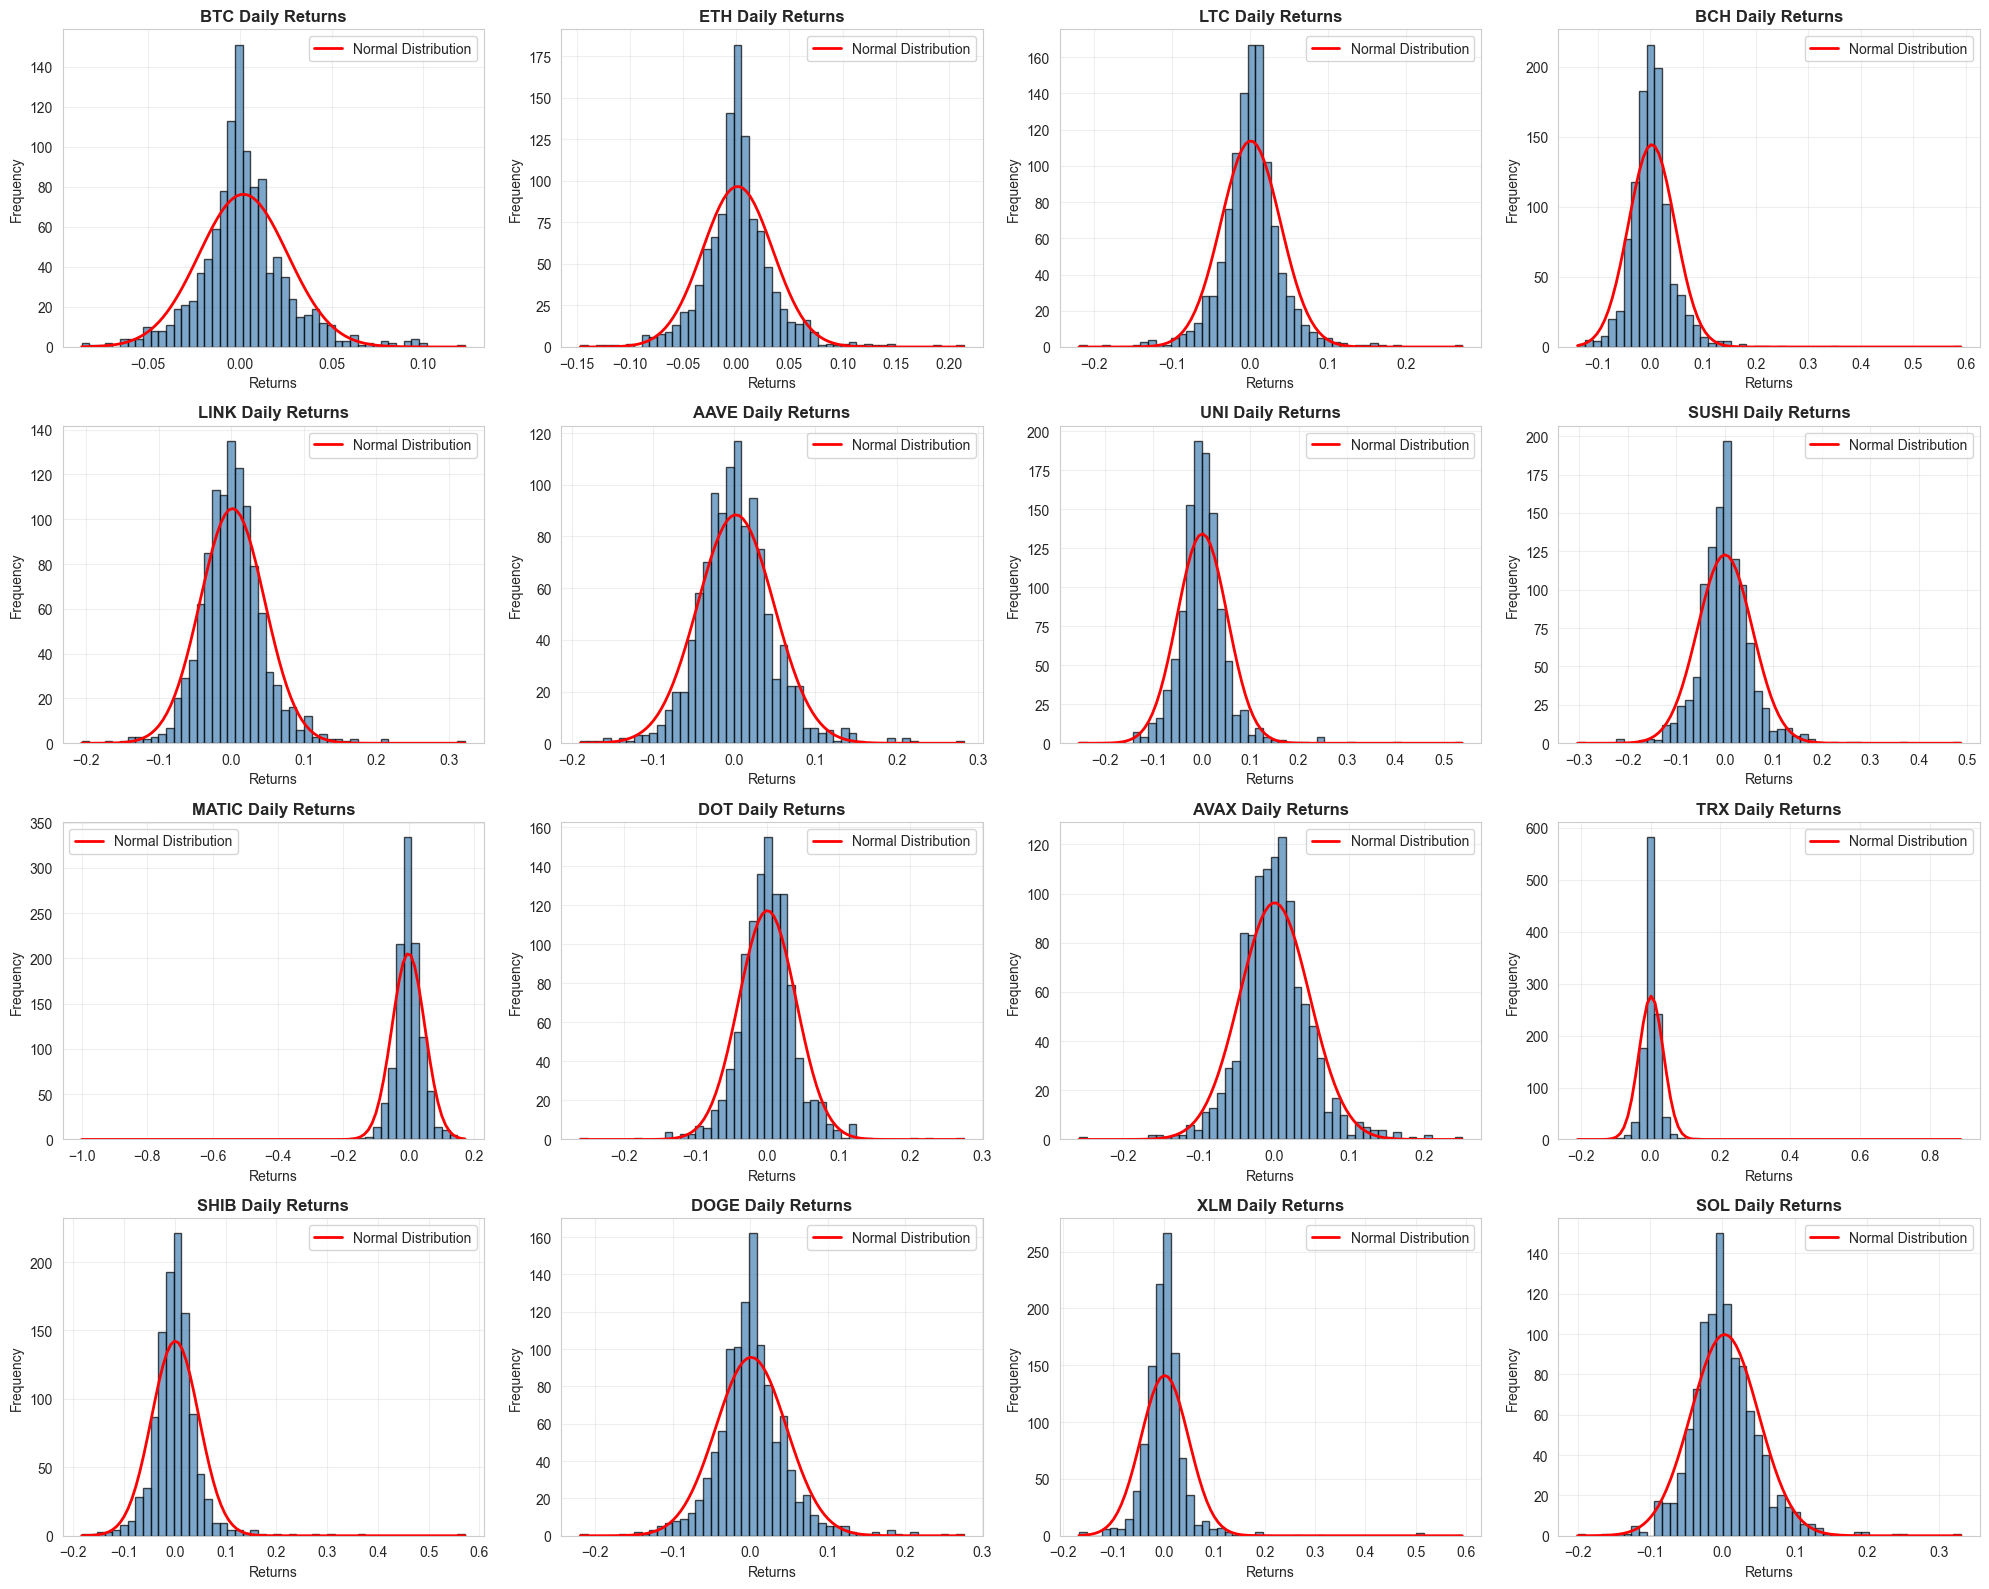

✓ Returns distributions plotted


In [5]:
# Plot histograms of returns for all assets
n_assets = len(returns_df.columns)
n_cols = 4
n_rows = (n_assets + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, asset in enumerate(returns_df.columns):
    ax = axes[idx]
    
    # Clean data - remove infinites and NaN
    data = returns_df[asset].replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(data) > 0:
        # Plot histogram
        ax.hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        
        # Overlay normal distribution
        mu, std = data.mean(), data.std()
        if std > 0:  # Only plot if there's variation
            x = np.linspace(data.min(), data.max(), 100)
            ax.plot(x, stats.norm.pdf(x, mu, std) * len(data) * (data.max() - data.min()) / 50, 
                    'r-', linewidth=2, label='Normal Distribution')
        
        ax.set_title(f'{asset} Daily Returns', fontweight='bold')
        ax.set_xlabel('Returns')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'{asset}\nNo valid data', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

# Hide unused subplots
for idx in range(n_assets, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✓ Returns distributions plotted")

## Normality Tests

Test whether returns follow a normal distribution using multiple statistical tests.

In [6]:
# Perform normality tests
normality_results = []

for asset in returns_df.columns:
    data = returns_df[asset].dropna()
    
    # Jarque-Bera test
    jb_stat, jb_pvalue = jarque_bera(data)
    
    # Shapiro-Wilk test (for smaller samples)
    if len(data) <= 5000:
        sw_stat, sw_pvalue = shapiro(data)
    else:
        sw_stat, sw_pvalue = np.nan, np.nan
    
    # D'Agostino and Pearson's test
    k2_stat, k2_pvalue = normaltest(data)
    
    normality_results.append({
        'Asset': asset,
        'JB_Statistic': jb_stat,
        'JB_p-value': jb_pvalue,
        'JB_Normal': jb_pvalue > 0.05,
        'SW_Statistic': sw_stat,
        'SW_p-value': sw_pvalue,
        'SW_Normal': sw_pvalue > 0.05 if not np.isnan(sw_pvalue) else None,
        'K2_Statistic': k2_stat,
        'K2_p-value': k2_pvalue,
        'K2_Normal': k2_pvalue > 0.05
    })

normality_df = pd.DataFrame(normality_results)

print("Normality Test Results (p-value > 0.05 indicates normality):")
print("="*70)
print(normality_df.to_string(index=False))

# Summary
print("\n" + "="*70)
print("Summary:")
print("="*70)
jb_normal = normality_df['JB_Normal'].sum()
k2_normal = normality_df['K2_Normal'].sum()
print(f"Assets passing Jarque-Bera test: {jb_normal}/{len(normality_df)}")
print(f"Assets passing D'Agostino-Pearson test: {k2_normal}/{len(normality_df)}")
print("\nInterpretation: Most crypto returns are NOT normally distributed")
print("This is typical - they exhibit fat tails and skewness")

Normality Test Results (p-value > 0.05 indicates normality):
Asset  JB_Statistic    JB_p-value  JB_Normal  SW_Statistic   SW_p-value  SW_Normal  K2_Statistic    K2_p-value  K2_Normal
  BTC  3.957031e+02  1.186191e-86      False      0.952750 2.137445e-18      False    122.360837  2.689563e-27      False
  ETH  1.075913e+03 2.336344e-234      False      0.939044 6.727228e-21      False    179.434235  1.087304e-39      False
  LTC  1.626730e+03  0.000000e+00      False      0.930757 3.243555e-22      False    156.054661  1.297660e-34      False
  BCH  5.012848e+04  0.000000e+00      False      0.829977 1.009978e-32      False    867.183833 4.936547e-189      False
 LINK  9.237467e+02 2.576005e-201      False      0.957959 2.629114e-17      False    174.859640  1.070808e-38      False
 AAVE  5.190203e+02 1.977761e-113      False      0.963282 4.344568e-16      False    133.047688  1.285469e-29      False
  UNI  1.329100e+04  0.000000e+00      False      0.867343 1.323638e-29      False   

/Users/olaoluwatunmise/rust_lang_book/risk-parity-ml/risk-parity/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1970: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu
/Users/olaoluwatunmise/rust_lang_book/risk-parity-ml/risk-parity/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1158: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


## Correlation Analysis Over Time

Analyze how correlations between assets change over time using rolling windows.

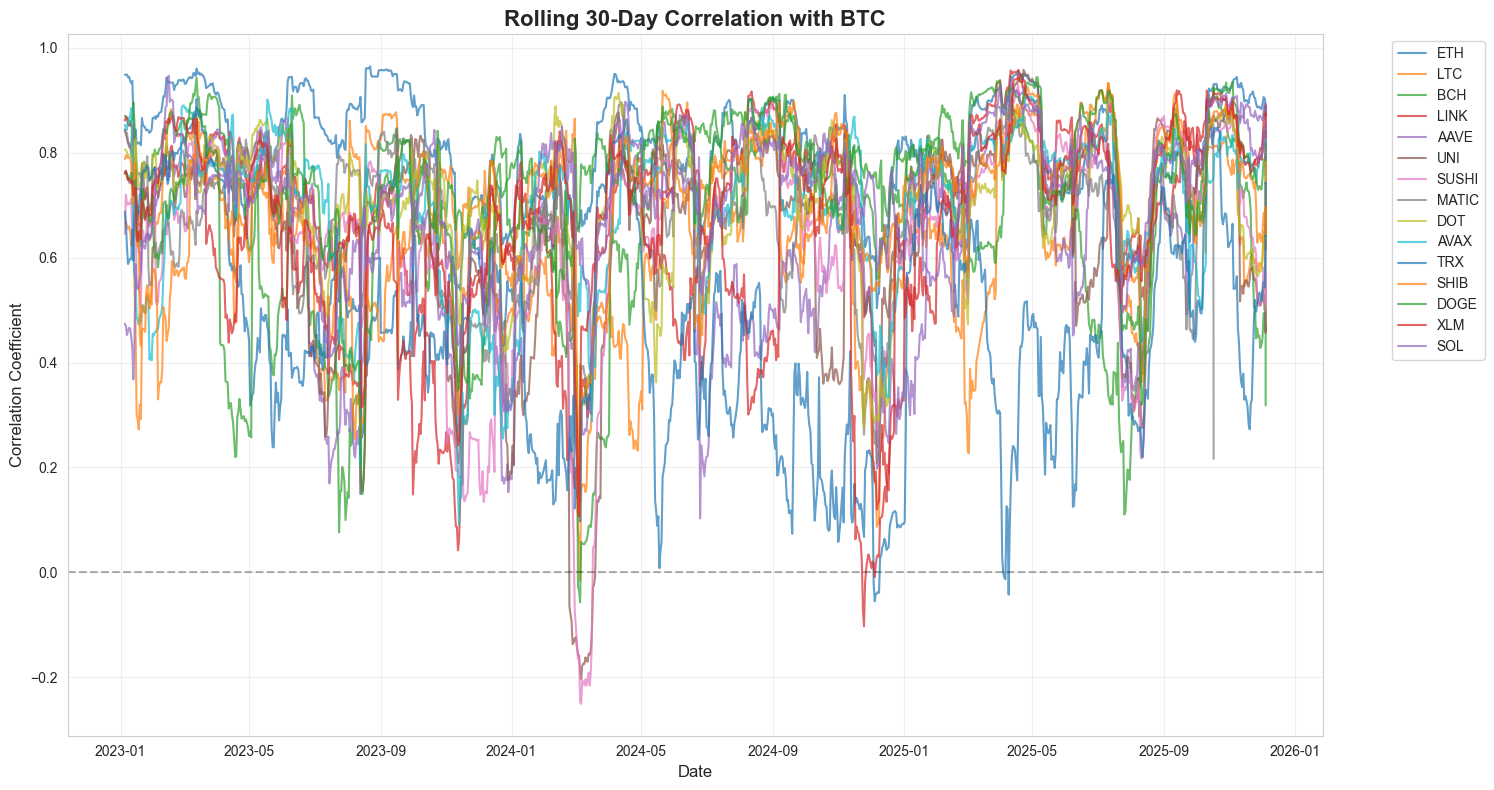

✓ Rolling correlation analysis with BTC complete


In [7]:
# Calculate rolling correlation (30-day window)
window = 30

# Pick a reference asset (e.g., BTC)
reference_asset = 'BTC' if 'BTC' in returns_df.columns else returns_df.columns[0]

rolling_corrs = pd.DataFrame(index=returns_df.index)

for asset in returns_df.columns:
    if asset != reference_asset:
        rolling_corrs[asset] = returns_df[reference_asset].rolling(window).corr(returns_df[asset])

# Plot rolling correlations
plt.figure(figsize=(15, 8))
for asset in rolling_corrs.columns:
    plt.plot(rolling_corrs.index, rolling_corrs[asset], label=asset, alpha=0.7, linewidth=1.5)

plt.title(f'Rolling {window}-Day Correlation with {reference_asset}', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ Rolling correlation analysis with {reference_asset} complete")

## Volatility Clustering Analysis

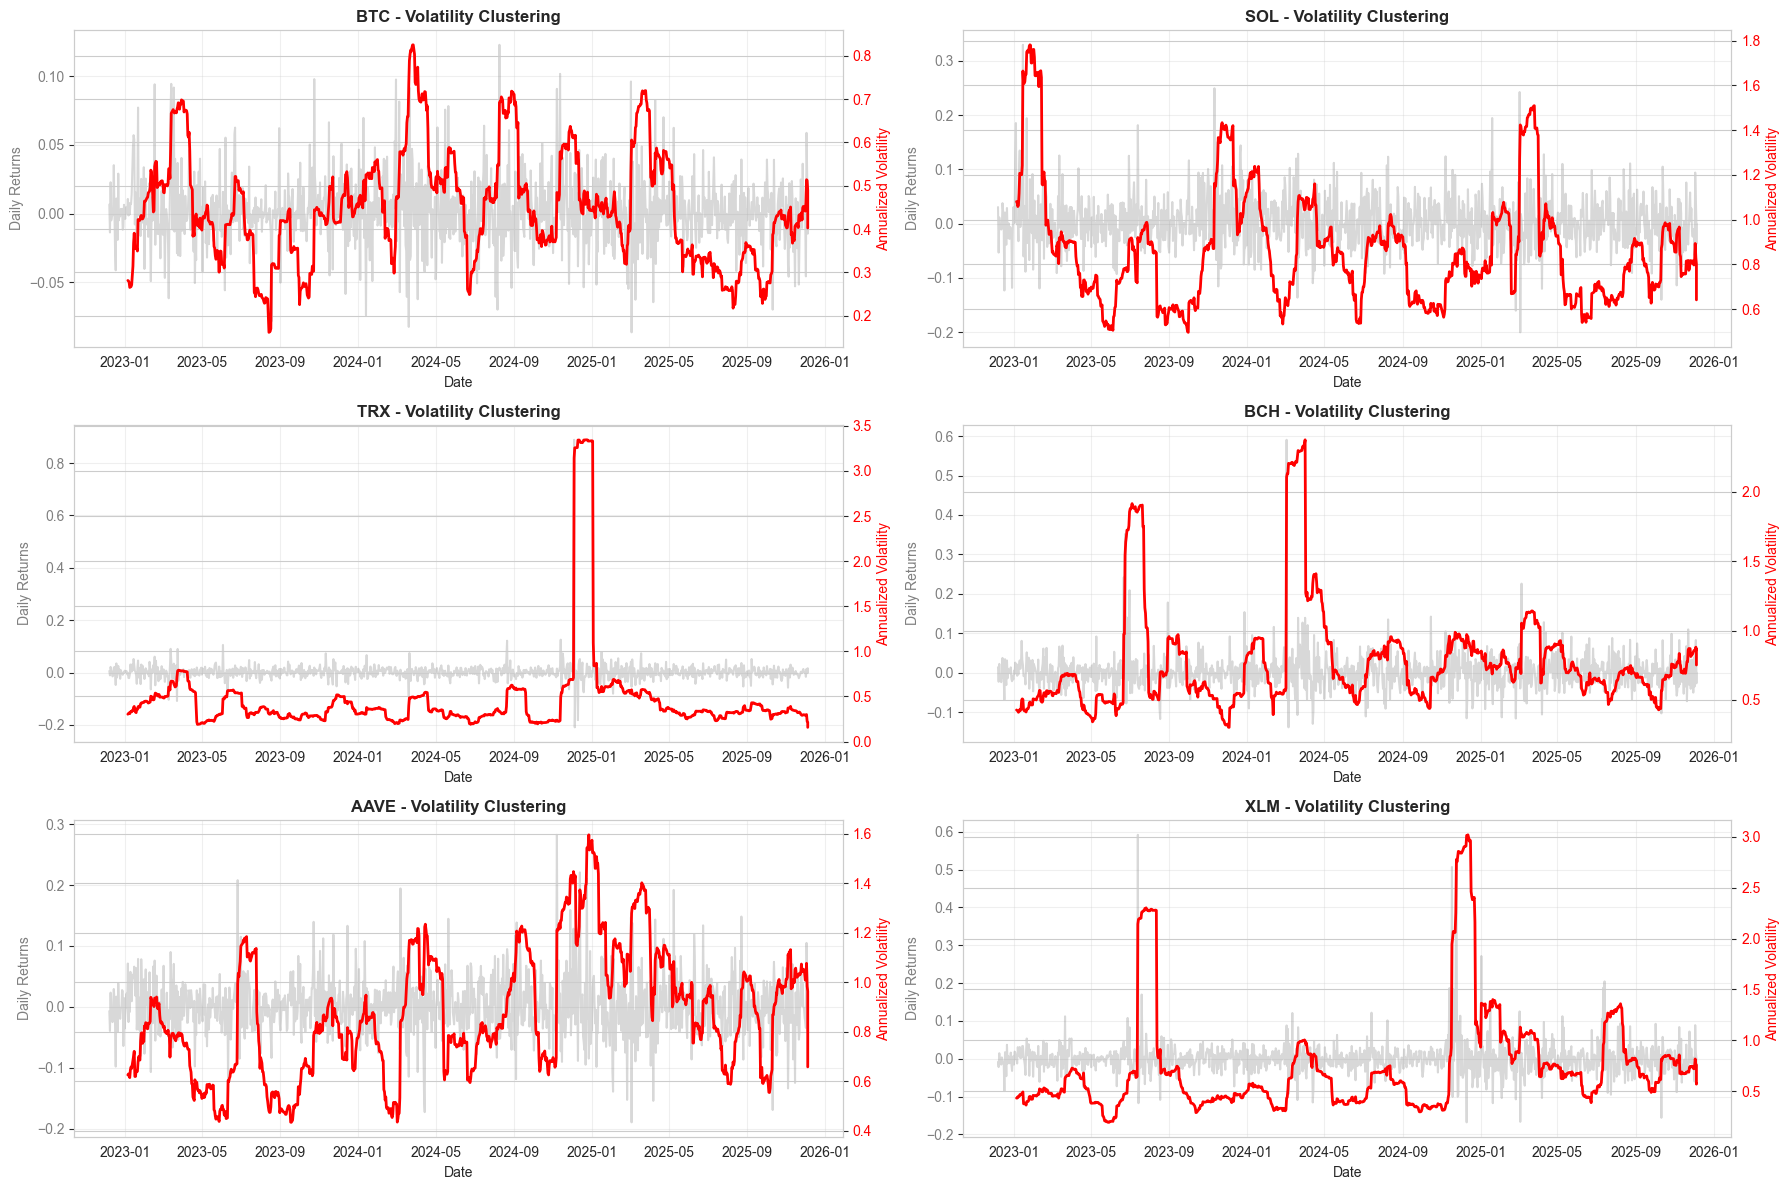

✓ Volatility clustering visualization complete

Observation: Periods of high volatility tend to cluster together
This is a key characteristic of financial time series


In [8]:
# Calculate rolling volatility
rolling_vol = returns_df.rolling(window=30).std() * np.sqrt(365)

# Select top 6 assets by market cap for visualization
top_assets = risk_metrics.head(6)['Asset'].tolist()

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, asset in enumerate(top_assets):
    if asset in rolling_vol.columns:
        ax = axes[idx]
        
        # Plot returns
        ax2 = ax.twinx()
        ax.plot(returns_df.index, returns_df[asset], alpha=0.3, color='gray', label='Daily Returns')
        ax2.plot(rolling_vol.index, rolling_vol[asset], color='red', linewidth=2, label='30-Day Volatility')
        
        ax.set_title(f'{asset} - Volatility Clustering', fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Daily Returns', color='gray')
        ax2.set_ylabel('Annualized Volatility', color='red')
        ax.tick_params(axis='y', labelcolor='gray')
        ax2.tick_params(axis='y', labelcolor='red')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Volatility clustering visualization complete")
print("\nObservation: Periods of high volatility tend to cluster together")
print("This is a key characteristic of financial time series")

## Prepare Merged Dataset for ML

Combine all collected features into a single DataFrame optimized for the HRP unsupervised learning strategy.

In [9]:
print("Preparing merged dataset for HRP ML strategy...")
print("="*70)

# 1. Start with returns (already clean)
ml_data = returns_df.copy()
print(f"✓ Base dataset: Returns ({ml_data.shape})")

# 2. Add rolling volatility (30-day)
rolling_volatility = returns_df.rolling(window=30).std() * np.sqrt(365)
for col in rolling_volatility.columns:
    ml_data[f'{col}_volatility_30d'] = rolling_volatility[col]
print(f"✓ Added rolling volatility features")

# 3. Add normalized volumes (z-score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Align volumes_df to ml_data index first
volumes_aligned = volumes_df.reindex(ml_data.index)
for col in volumes_aligned.columns:
    if col in ml_data.columns:  # Match assets
        vol_normalized = scaler.fit_transform(volumes_aligned[[col]])
        ml_data[f'{col}_volume_zscore'] = vol_normalized.flatten()
print(f"✓ Added normalized volume features")

# 4. Add normalized market caps (z-score)
# Align market_caps_df to ml_data index first
market_caps_aligned = market_caps_df.reindex(ml_data.index)
for col in market_caps_aligned.columns:
    if col in returns_df.columns:  # Match assets
        mcap_normalized = scaler.fit_transform(market_caps_aligned[[col]])
        ml_data[f'{col}_mcap_zscore'] = mcap_normalized.flatten()
print(f"✓ Added normalized market cap features")

# 5. Add Fear & Greed Index (aligned to daily data)
fng_aligned = fng_df[['value']].copy()
fng_aligned.columns = ['fear_greed_index']
# Reindex to match ml_data dates and forward fill
fng_aligned = fng_aligned.reindex(ml_data.index, method='ffill')
ml_data = ml_data.join(fng_aligned)
print(f"✓ Added Fear & Greed Index")

# 6. Add momentum indicators (5, 10, 20 day returns)
for period in [5, 10, 20]:
    momentum = prices_df.pct_change(periods=period)
    for col in momentum.columns:
        ml_data[f'{col}_momentum_{period}d'] = momentum[col]
print(f"✓ Added momentum indicators (5, 10, 20 day)")

# 7. Add rolling correlations with BTC (if available)
if 'BTC' in returns_df.columns:
    for col in returns_df.columns:
        if col != 'BTC':
            rolling_corr = returns_df['BTC'].rolling(window=30).corr(returns_df[col])
            ml_data[f'{col}_corr_BTC_30d'] = rolling_corr
    print(f"✓ Added rolling BTC correlations")

# 8. Clean the merged dataset
# Remove rows with too many NaN (keep rows with at least 50% data)
threshold = len(ml_data.columns) * 0.5
ml_data_clean = ml_data.dropna(thresh=threshold)

# Forward fill remaining NaN values
ml_data_clean = ml_data_clean.ffill()

# Backward fill any remaining NaN at the start
ml_data_clean = ml_data_clean.bfill()

# Drop any remaining rows with NaN
initial_rows = len(ml_data_clean)
ml_data_clean = ml_data_clean.dropna()
rows_dropped = initial_rows - len(ml_data_clean)

print(f"\n{'='*70}")
print("Merged Dataset Summary:")
print(f"{'='*70}")
print(f"Original shape: {ml_data.shape}")
print(f"After cleaning: {ml_data_clean.shape}")
print(f"Rows dropped: {rows_dropped}")
print(f"Date range: {ml_data_clean.index.min()} to {ml_data_clean.index.max()}")
print(f"\nFeature categories:")
print(f"  - Daily returns: {len(returns_df.columns)} features")
print(f"  - Volatility: {len(returns_df.columns)} features")
print(f"  - Volume (normalized): {len([c for c in ml_data_clean.columns if 'volume_zscore' in c])} features")
print(f"  - Market cap (normalized): {len([c for c in ml_data_clean.columns if 'mcap_zscore' in c])} features")
print(f"  - Momentum indicators: {len([c for c in ml_data_clean.columns if 'momentum' in c])} features")
print(f"  - BTC correlations: {len([c for c in ml_data_clean.columns if 'corr_BTC' in c])} features")
print(f"  - Fear & Greed Index: 1 feature")
print(f"\nTotal features: {len(ml_data_clean.columns)}")

# Display first few rows
print(f"\n{'='*70}")
print("Sample of merged data (first 5 rows, first 10 columns):")
print(f"{'='*70}")
print(ml_data_clean.iloc[:5, :10])

# Check for any remaining issues
print(f"\n{'='*70}")
print("Data Quality Check:")
print(f"{'='*70}")
print(f"Missing values: {ml_data_clean.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(ml_data_clean.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Data types: {ml_data_clean.dtypes.value_counts().to_dict()}")

print(f"\n✓ Merged dataset ready for HRP strategy!")

Preparing merged dataset for HRP ML strategy...
✓ Base dataset: Returns ((1107, 16))
✓ Added rolling volatility features
✓ Added normalized volume features
✓ Added normalized market cap features
✓ Added Fear & Greed Index
✓ Added momentum indicators (5, 10, 20 day)
✓ Added rolling BTC correlations

Merged Dataset Summary:
Original shape: (1107, 128)
After cleaning: (1103, 128)
Rows dropped: 0
Date range: 2022-12-11 00:00:00 to 2025-12-04 21:38:21

Feature categories:
  - Daily returns: 16 features
  - Volatility: 16 features
  - Volume (normalized): 16 features
  - Market cap (normalized): 16 features
  - Momentum indicators: 48 features
  - BTC correlations: 15 features
  - Fear & Greed Index: 1 feature

Total features: 128

Sample of merged data (first 5 rows, first 10 columns):
                 BTC       ETH       LTC       BCH      LINK      AAVE  \
date                                                                     
2022-12-11 -0.001426  0.000249 -0.000794 -0.007161 -0.002015

## Save Merged Dataset

Save the prepared ML dataset for use in the HRP strategy notebook.

In [10]:
# Save the merged ML dataset
import os

# Create ML data package
ml_package = {
    'ml_data': ml_data_clean,
    'returns_df': returns_df,
    'prices_df': prices_df,
    'correlation_matrix': correlation_matrix,
    'covariance_matrix': covariance_matrix,
    'risk_metrics': risk_metrics,
    'metadata': {
        'creation_date': datetime.now().isoformat(),
        'num_features': len(ml_data_clean.columns),
        'num_samples': len(ml_data_clean),
        'date_range': {
            'start': str(ml_data_clean.index.min()),
            'end': str(ml_data_clean.index.max())
        },
        'assets': list(returns_df.columns),
        'feature_categories': {
            'returns': len(returns_df.columns),
            'volatility': len(returns_df.columns),
            'volume_features': len([c for c in ml_data_clean.columns if 'volume_zscore' in c]),
            'marketcap_features': len([c for c in ml_data_clean.columns if 'mcap_zscore' in c]),
            'momentum_features': len([c for c in ml_data_clean.columns if 'momentum' in c]),
            'correlation_features': len([c for c in ml_data_clean.columns if 'corr_BTC' in c]),
            'sentiment': 1
        }
    }
}

# Save with joblib
ml_file = '../data/ml_ready_data.joblib'
joblib.dump(ml_package, ml_file, compress=3)

print("✓ ML dataset saved successfully")
print(f"\nFile: {ml_file}")
print(f"Size: {os.path.getsize(ml_file) / 1024:.2f} KB")

print(f"\n{'='*70}")
print("To load in HRP notebook:")
print(f"{'='*70}")
print("import joblib")
print("ml_data = joblib.load('../data/ml_ready_data.joblib')")
print("X = ml_data['ml_data']")
print("returns = ml_data['returns_df']")
print("# ... etc")

print(f"\n{'='*70}")
print("Next Steps:")
print(f"{'='*70}")
print("1. Create 03_hrp_strategy.ipynb notebook")
print("2. Load ml_ready_data.joblib")
print("3. Apply Hierarchical Risk Parity algorithm")
print("4. Generate optimal portfolio weights")
print("5. Backtest the strategy")

✓ ML dataset saved successfully

File: ../data/ml_ready_data.joblib
Size: 1304.31 KB

To load in HRP notebook:
import joblib
ml_data = joblib.load('../data/ml_ready_data.joblib')
X = ml_data['ml_data']
returns = ml_data['returns_df']
# ... etc

Next Steps:
1. Create 03_hrp_strategy.ipynb notebook
2. Load ml_ready_data.joblib
3. Apply Hierarchical Risk Parity algorithm
4. Generate optimal portfolio weights
5. Backtest the strategy
